In [1]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
data=pd.read_csv('NAOP_new.csv', encoding='cp1252')

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (133,134,140,141,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,178,179,180,181,182,183,184,185,186,187,188,191,192,193,194,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head(5)

,Unnamed: 0,Type,Posts,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259
0,1,A,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...,as...|||84389 84390 http://wallpaperpassion...,wellbrutin,at least thirty minutes of moving your legs (...,weed in moderation (maybe try edibles as a he...,given each types' cognitive functions and wha...,when left by...|||All things in moderation. ...,and a good one at that. Note: a good one at t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,B,'I'm finding the lack of me in these posts ver...,like the former responses of this thread I wi...,return,and find people are still commenting on your ...,when a man has special knowledge and special ...,it rather encourages him to seek a complex......,000+ post|||Not really,I've never thought of E/I or J/P as real func...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,A,'Good one _____ https://www.youtube.com/wat...,to which I say I know,that's my blessing and my curse.|||Does being...,than yes. Or it's more I could be madly in ...,I didn't,thank you for a link!|||So-called Ti-Si loop ...,and your mind just wanders in circles. Feels ...,which I highly doubt): hi. 700049 700057|||...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,A,'Dear INTP,I enjoyed our conversation the other day. ...,Long time no see. Sincerely,Alpha|||None of them. All other types hurt in...,like everything in humanity.|||Draco Malfoy a...,though in which stacking to me is a somewhat ...,a...|||I'm not particularly introverted or ex...,personally. That said,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,B,'You're fired.|||That's another silly misconce...,then that's what may be cooking him. Who want...,but...|||I would have just taken the project ...,then was shut down because she went from havi...,to her boss is married and she wasn't interes...,and the scenario is so similar.|||3X|||11/25 ...,however I do like the spotlight.|||I think th...,jigsaw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
 data_new = data.drop(['Type', 'Unnamed: 0'], axis = 1)

In [6]:
data_new["something"] = ""
for i, something in enumerate(data_new['Posts']):
    print(i)
    sent = ""
    for col in data_new.columns:
        sent = str(sent)+str(data_new[col][i])
    data_new["something"][i] = sent

0
1
2
3
4
5
6
7
8
9
10


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
2

1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084


3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724


5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383


6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031


8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674


In [7]:
data = data[["Type"]]

In [8]:
data["posts"] = data_new["something"]

In [9]:
data.head()

,Type,posts
0,A,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1,B,'I'm finding the lack of me in these posts ver...
2,A,'Good one _____ https://www.youtube.com/wat...
3,A,'Dear INTP I enjoyed our conversation the ot...
4,B,'You're fired.|||That's another silly misconce...


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
Type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.7+ KB


In [11]:
data.shape

(8675, 2)

In [12]:
data.describe()

,Type,posts
count,8675,8675
unique,4,8675
top,A,'I don't know if it was the best one but undou...
freq,5697,1


In [13]:
data1=data

In [14]:
data['posts'][0]

"http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...||

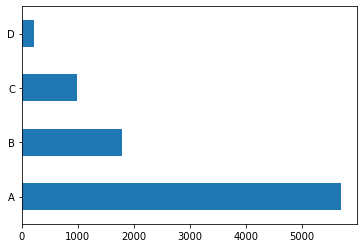

In [15]:
data.Type.value_counts().plot(kind='barh')

In [16]:
data.Type.replace({'A':0,'B':1,'C':2,'D':3}, inplace=True)

In [17]:
data.head(5)

,Type,posts
0,0,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1,1,'I'm finding the lack of me in these posts ver...
2,0,'Good one _____ https://www.youtube.com/wat...
3,0,'Dear INTP I enjoyed our conversation the ot...
4,1,'You're fired.|||That's another silly misconce...


In [18]:
data['word_count']=data['posts'].apply(lambda x: len(x.split()))

In [19]:
data['char_count']=data['posts'].apply(lambda x: len(x))

In [20]:
data.head()

,Type,posts,word_count,char_count
0,0,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...,556,5358
1,1,'I'm finding the lack of me in these posts ver...,1170,7728
2,0,'Good one _____ https://www.youtube.com/wat...,836,5900
3,0,'Dear INTP I enjoyed our conversation the ot...,1064,6838
4,1,'You're fired.|||That's another silly misconce...,967,6754


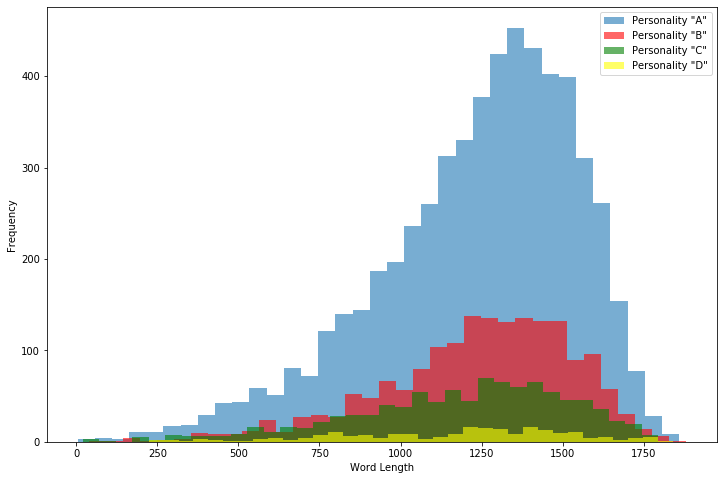

In [21]:
plt.figure(figsize=(12,8))
data[data.Type==0].word_count.plot(kind='hist',alpha=0.6,bins=35,label='Personality "A"')
data[data.Type==1].word_count.plot(kind='hist', color='red',alpha=0.6,bins=35,label='Personality "B"')
data[data.Type==2].word_count.plot(kind='hist', color='green',alpha=0.6,bins=35,label='Personality "C"')
data[data.Type==3].word_count.plot(kind='hist', color='yellow',alpha=0.6,bins=35,label='Personality "D"')


plt.legend()
plt.xlabel("Word Length")
plt.show()

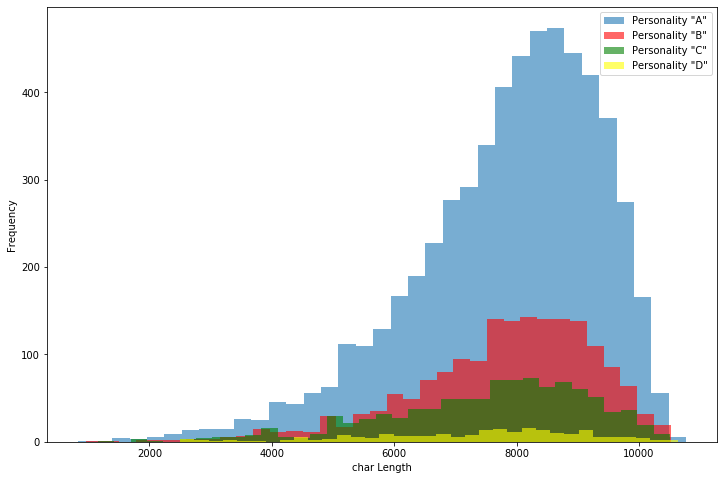

In [22]:
plt.figure(figsize=(12,8))
data[data.Type==0].char_count.plot(kind='hist',alpha=0.6,bins=35,label='Personality "A"')
data[data.Type==1].char_count.plot(kind='hist', color='red',alpha=0.6,bins=35,label='Personality "B"')
data[data.Type==2].char_count.plot(kind='hist', color='green',alpha=0.6,bins=35,label='Personality "C"')
data[data.Type==3].char_count.plot(kind='hist', color='yellow',alpha=0.6,bins=35,label='Personality "D"')


plt.legend()
plt.xlabel("char Length")
plt.show()

In [23]:
import re 
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop=nltk.corpus.stopwords.words('english')
len(stop)

179

In [26]:
stop=set(stop)
stop.update(['infj','entp','intp','intj','love','the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which',
              'Is','If','While','This','way','something','lot',
                                           'entj','enfj','infp','enfp',
                                           'isfp','istp','isfj','istj',
                                           'estp','esfp','estj','esfj',
                                           'infjs','entps','intps','intjs',
                                           'entjs','enfjs','infps','enfps',
                                           'isfps','istps','isfjs','istjs',
                                           'estps','esfps','estjs','esfjs'])

In [27]:
import re
import string
from nltk.stem import PorterStemmer

In [28]:
data['posts'] = data['posts'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [29]:
def clean_text(text):
    result = re.sub(r'http[^\s]*', ' ',text)
    result = re.sub('[0-9]+',' ', result)
    result = re.sub('@[a-z0-9]+', ' ', result)
    result.replace('|||',' ')
    result = re.sub(r"what's", "", result)
    result = re.sub(r"What's", "", result)
    result = re.sub(r"\'s", " ", result)
    result = re.sub(r"\'ve", " have ", result)
    result = re.sub(r"can't", "cannot ", result)
    result = re.sub(r"n't", " not ", result)
    result = re.sub(r"I'm", "I am", result)
    result = re.sub(r" m ", " am ", result)
    result = re.sub(r"\'re", " are ", result)
    result = re.sub(r"\'d", " would ", result)
    result = re.sub(r"\'ll", " will ", result)
    return re.sub('[%s]*' % string.punctuation, '',result)

In [30]:
data['posts']=data['posts'].apply(lambda x: clean_text(x))

In [31]:
data.posts[0]

'  and intj moments   sportscenter not top ten plays   prankswhat has been the most lifechanging experience in your life    on repeat for most of todaymay the perc experience immerse youthe last thing my infj friend posted on his facebook before committing suicide the next day rest in peace   enfj  sorry to hear of your distress it  only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as        welcome and stuff  game set matchprozac wellbrutin at least thirty minutes of moving your legs and i do not  mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternativebasically come up with three items you have  determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left byall things in moderation sims is indeed a video game and a good one at that note a good one 

In [32]:
data['posts']=data['posts'].apply(lambda x: ' '.join(word for word in x.split()if not word  in stop))

In [33]:
freq = pd.Series(' '.join(data['posts']).split()).value_counts()[:10]
freq

like      67143
im        65584
would     52301
think     48647
people    45255
know      35685
one       34352
really    34018
get       29951
time      25551
dtype: int64

In [34]:
data['posts']=data['posts'].apply(lambda x: ' '.join(word for word in x.split()if not word  in freq))

In [35]:
low_freq_words=pd.Series(' '.join(data['posts']).split()).value_counts()[-10:]
low_freq_words

missplaced                1
imummmm                   1
revengeprocrastination    1
stillintroduction         1
keepviolet                1
normalcorporate           1
masseurs                  1
flix                      1
witthout                  1
itnoted                   1
dtype: int64

In [36]:
data['posts']=data['posts'].apply(lambda x: ' '.join(word for word in x.split()if not word  in low_freq_words))

In [37]:
data.posts

0       moments sportscenter top ten plays prankswhat ...
1       finding lack posts alarmingsex boring position...
2       good course say blessing cursedoes absolutely ...
3       ear enjoyed conversation day esoteric gabbing ...
4       firedthat another silly misconception approach...
                              ...                        
8670    always cats fi doms reason websites become neo...
8671    oif thread already exists someplace else heck ...
8672    many questions things take purple pill pick wi...
8673    conflicted right comes wanting children honest...
8674    long since personalitycafe although seem chang...
Name: posts, Length: 8675, dtype: object

In [38]:
from textblob import Word

In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
data['posts']=data['posts'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))

In [41]:
from textblob import TextBlob

In [42]:
pol=lambda x: TextBlob(x).sentiment.polarity
sub=lambda x: TextBlob(x).sentiment.subjectivity

In [43]:
data['polarity']=data['posts'].apply(pol)
data['subjectivity']=data['posts'].apply(sub)

In [44]:
data.head(10)

,Type,posts,word_count,char_count,polarity,subjectivity
0,0,moment sportscenter top ten play prankswhat li...,556,5358,0.107240,0.474681
1,1,finding lack post alarmingsex boring position ...,1170,7728,0.097469,0.498765
2,0,good course say blessing cursedoes absolutely ...,836,5900,0.148182,0.578733
3,0,ear enjoyed conversation day esoteric gabbing ...,1064,6838,0.109827,0.523954
4,1,firedthat another silly misconception approach...,967,6754,0.023077,0.547587
5,0,science perfect scientist claim scientific inf...,1491,9072,0.054672,0.490473
6,0,cannot draw nail haha done professional nail y...,1329,8491,0.113569,0.483068
7,0,tend build collection thing desktop use freque...,1222,7511,0.093086,0.481622
8,0,sure good question distinction two dependant p...,738,5976,0.068135,0.512191
9,0,position actually let go person due various re...,1233,8112,0.134497,0.484163


In [45]:
data.posts[2]

'good course say blessing cursedoes absolutely positive best friend could amazing couple count yes could madly case reconciled feeling atno thank linksocalled tisi loop stem current topicobsession deadly stuck thought mind wanders circle feel truly terrible noticed peculiar vegetation look grass dozen different plant specie imagine hundred year later whenif soilthe smith – never everi often find spotting face marble tileswoodthis yearold sentence incredibly accurate beautiful descriptioni visited website last year whoever read maybe even remembers highly doubt hi sit garden pm writing song sing together dozen cricket playing acoustic guitarthis intpish thread ever seeni able look painting entire life knew picked human beingi drawing background animation working right mar felt obligated make mark watneyx postcard read booki started make comic turtle gordon unicorn chime see two first story recently started post comic two friend turtle gordon unicorn chime posted stuff interested try inc

In [46]:
def sentiment_text_pol(polarity):
  if -1<=polarity<0.0:
      return 'negative'
  elif 0.0<=polarity<0.1:
      return 'neutral'  
  elif 0.1<=polarity<1:
      return 'positve'

In [47]:
def subjectivity_text_pol(subjectivity):
  if 0<=subjectivity<0.5:
    return 'Facts'
  if 0.5<=subjectivity<1:
    return  'Opinion' 

In [48]:
data['polarity']=data['polarity'].apply(lambda x: sentiment_text_pol(x))

In [49]:
data['subjectivity']=data['subjectivity'].apply(lambda x: subjectivity_text_pol(x))

In [50]:
data.head(5)

,Type,posts,word_count,char_count,polarity,subjectivity
0,0,moment sportscenter top ten play prankswhat li...,556,5358,positve,Facts
1,1,finding lack post alarmingsex boring position ...,1170,7728,neutral,Facts
2,0,good course say blessing cursedoes absolutely ...,836,5900,positve,Opinion
3,0,ear enjoyed conversation day esoteric gabbing ...,1064,6838,positve,Opinion
4,1,firedthat another silly misconception approach...,967,6754,neutral,Opinion


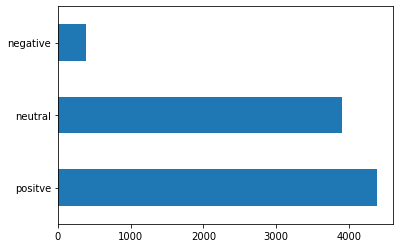

In [51]:
data.polarity.value_counts().plot(kind='barh')

In [52]:
grouped=data.groupby(data['Type'])

In [53]:
A=pd.DataFrame(grouped.get_group(0))
B=pd.DataFrame(grouped.get_group(1))
C=pd.DataFrame(grouped.get_group(2))
D=pd.DataFrame(grouped.get_group(3))

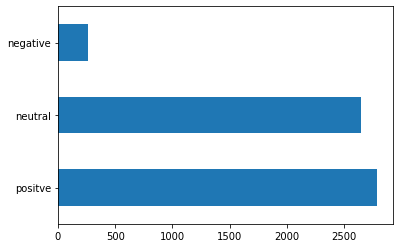

In [54]:
A.polarity.value_counts().plot(kind='barh')

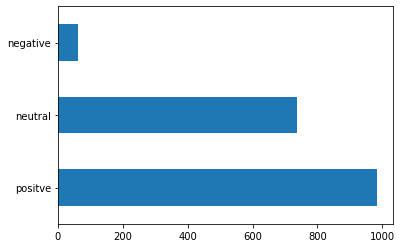

In [55]:
B.polarity.value_counts().plot(kind='barh')

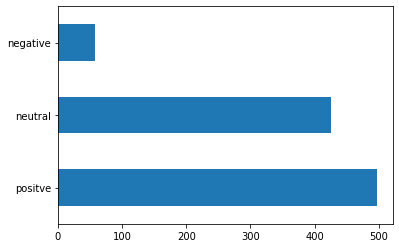

In [56]:
C.polarity.value_counts().plot(kind='barh')

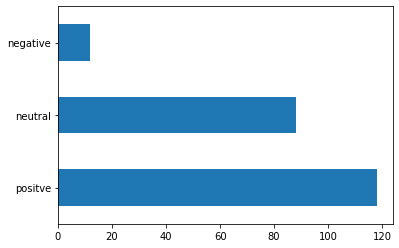

In [57]:
D.polarity.value_counts().plot(kind='barh')

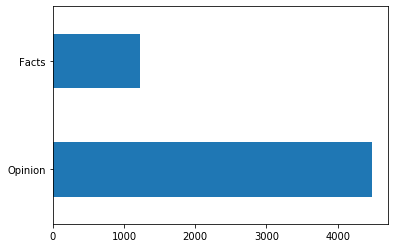

In [58]:
A.subjectivity.value_counts().plot(kind='barh')

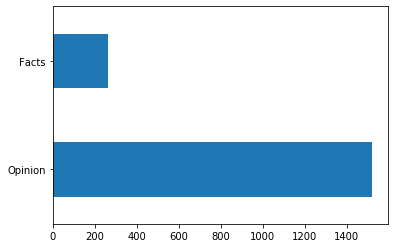

In [59]:
B.subjectivity.value_counts().plot(kind='barh')

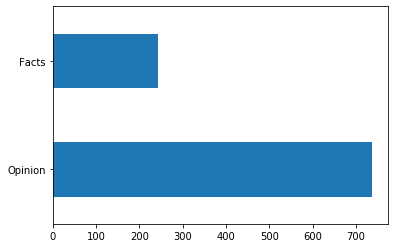

In [60]:
C.subjectivity.value_counts().plot(kind='barh')

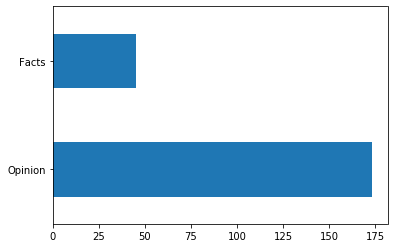

In [61]:
D.subjectivity.value_counts().plot(kind='barh')

In [62]:
from wordcloud import WordCloud,ImageColorGenerator
def word_cloud(text):
  text = " ".join(review for review in A.posts)
  wordcloud=WordCloud( background_color="white").generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

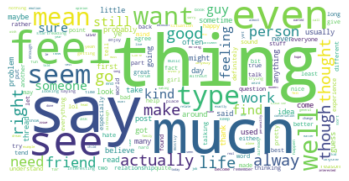

In [63]:
word_cloud(A['posts'])

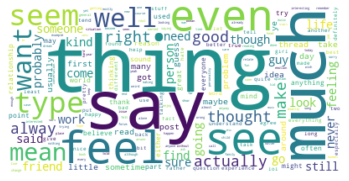

In [64]:
word_cloud(B['posts'])

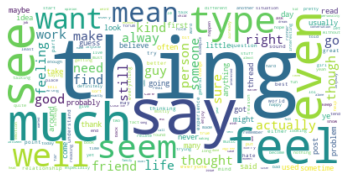

In [65]:
word_cloud(C['posts'])

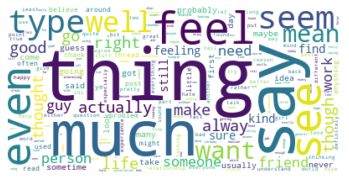

In [66]:
word_cloud(D['posts'])   

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [68]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = vectorizer.fit_transform(data['posts'])
features.shape

(8675, 115115)

In [69]:
# from sklearn import preprocessing
# y = preprocessing.label_binarize(data['Type'], classes=[0, 1, 2, 3])

In [70]:
from sklearn.model_selection import train_test_split

In [135]:
x_train, x_test, y_train, y_test = train_test_split(features,data['Type'], test_size=0.3, random_state=111)

In [79]:
from imblearn.over_sampling import SMOTE

In [136]:
sm = SMOTE()
x,y=sm.fit_sample(x_train,y_train)

In [101]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

In [154]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score


In [138]:
sgd=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd.fit(x,y)
sgd_prediction=sgd.predict(x_test)
sgd_acc=accuracy_score(y_test,sgd_prediction)
print('\n')
print('Accuracy of Naive Bayes =',accuracy_score(y_test,sgd_prediction))
print('\n-----------------\n')
print(classification_report(y_test,sgd_prediction))



Accuracy of Naive Bayes = 0.6112178255858625

-----------------

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1727
           1       0.47      0.40      0.43       540
           2       0.30      0.41      0.35       274
           3       0.09      0.31      0.14        62

    accuracy                           0.61      2603
   macro avg       0.41      0.46      0.42      2603
weighted avg       0.66      0.61      0.63      2603



In [139]:
mnb = MultinomialNB(alpha=0.2)
mnb.fit(x, y)
mnb_prediction = mnb.predict(x_test)
mnb_acc=accuracy_score(y_test,mnb_prediction)
print('\n')
print('Accuracy of Naive Bayes =',accuracy_score(y_test,mnb_prediction))
print('\n-----------------\n')
print(classification_report(y_test,mnb_prediction))



Accuracy of Naive Bayes = 0.6650019208605455

-----------------

              precision    recall  f1-score   support

           0       0.69      0.94      0.80      1727
           1       0.39      0.17      0.24       540
           2       0.55      0.07      0.12       274
           3       0.00      0.00      0.00        62

    accuracy                           0.67      2603
   macro avg       0.41      0.29      0.29      2603
weighted avg       0.60      0.67      0.59      2603



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
rf = RandomForestClassifier(n_estimators=50, max_depth=None, n_jobs=-1)
rf.fit(x, y)
rf_prediction = rf.predict(x_test)
rf_acc = accuracy_score(y_test,rf_prediction)
print('\n')
print('Accuracy of Naive Bayes =',accuracy_score(y_test,rf_prediction))
print('\n-----------------\n')
print(classification_report(y_test,rf_prediction))



Accuracy of Naive Bayes = 0.6600076834421821

-----------------

              precision    recall  f1-score   support

           0       0.66      0.99      0.79      1727
           1       0.33      0.02      0.04       540
           2       0.00      0.00      0.00       274
           3       0.00      0.00      0.00        62

    accuracy                           0.66      2603
   macro avg       0.25      0.25      0.21      2603
weighted avg       0.51      0.66      0.54      2603



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
clf = LogisticRegression(random_state=0, multi_class='ovr')
clf.fit(x,y)
clf_pred=clf.predict(x_test)
print('\n')
print('Accuracy of Naive Bayes =',accuracy_score(y_test,clf_pred))
print('\n-----------------\n')
print(classification_report(y_test,clf_pred))



Accuracy of Naive Bayes = 0.6772954283519017

-----------------

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1727
           1       0.45      0.39      0.42       540
           2       0.46      0.25      0.32       274
           3       0.00      0.00      0.00        62

    accuracy                           0.68      2603
   macro avg       0.41      0.37      0.38      2603
weighted avg       0.64      0.68      0.65      2603



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
